In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
table_data = pd.read_csv(
    "/data1/yejb/prosit/figure3/supply_origin/fine-tuned.csv")


In [3]:
def read_allele_len(data, allele):
    alleles = data[data['Allele'] == allele]
    baseline = alleles[alleles['SM_v2'].apply(
        lambda x: bool(x))]['Sequence'].to_list()
    prosit = alleles[alleles['Prosit'].apply(
        lambda x: bool(x))]['Sequence'].to_list()
    finetuned = alleles[alleles['Fine-tuned Prosit'].apply(
        lambda x: bool(x))]['Sequence'].to_list()
    return baseline, prosit, finetuned


def LSG(p1, p2):
    p1 = set(p1)
    p2 = set(p2)
    return p1 - p2, p1.intersection(p2), p2 - p1


In [4]:
all_alleles = table_data['Allele'].unique()
all_lsg = {}

for allele in all_alleles:
    _, p, f = read_allele_len(table_data, allele)
    l, s, g = LSG(p, f)
    all_lsg[allele] = (len(l), len(s), len(g))

all_lsg = [(k, v) for k, v in all_lsg.items()]
all_lsg = sorted(all_lsg, key=lambda x: x[1][1]+x[1][2])

In [9]:
def plot_alleles_lsg(all_lsg):
    all_lsg = sorted(all_lsg, key=lambda x: (x[1][1] + x[1][2]))
    c_loss = 'orange'
    c_shared = 'darkslateblue'
    c_gain = 'green'
    linewidth = 0.6
    barwidth = 0.9
    fig, ax = plt.subplots(figsize=(9, 6), dpi=200)

    alleles = [x[0].split("_")[0] for x in all_lsg]
    norm_sum = np.array([x[1][0] + x[1][1] for x in all_lsg])
    losses = np.array([-x[1][0] for x in all_lsg])
    shares = np.array([x[1][1] for x in all_lsg]) 
    gains = np.array([x[1][2] for x in all_lsg]) 
    x_ticks = list(range(len(alleles)))
    p1 = ax.bar(alleles, losses, barwidth, label="Loss",
                color=c_loss, linewidth=linewidth, edgecolor='black')
    p2 = ax.bar(alleles, shares, barwidth, label="Shared",
                color=c_shared, linewidth=linewidth, edgecolor='black')
    p3 = ax.bar(alleles, gains, barwidth, label="Gain", bottom=shares,
                color=c_gain, linewidth=linewidth, edgecolor='black')
    # for i, allele in enumerate(alleles):
    #     ax.text(i-0.2, 40000, str(gains[i]), rotation=90, va='center')
    #     ax.text(i-0.2, 20000, str(shares[i]), rotation=90, va='center')
    #     ax.text(i - 0.2, -3000, str(abs(losses[i])), rotation=90, va='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # ax.axes.get_xaxis().set_visible(False)
    return fig, ax


/tmp/ipykernel_72052/737678779.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


[]

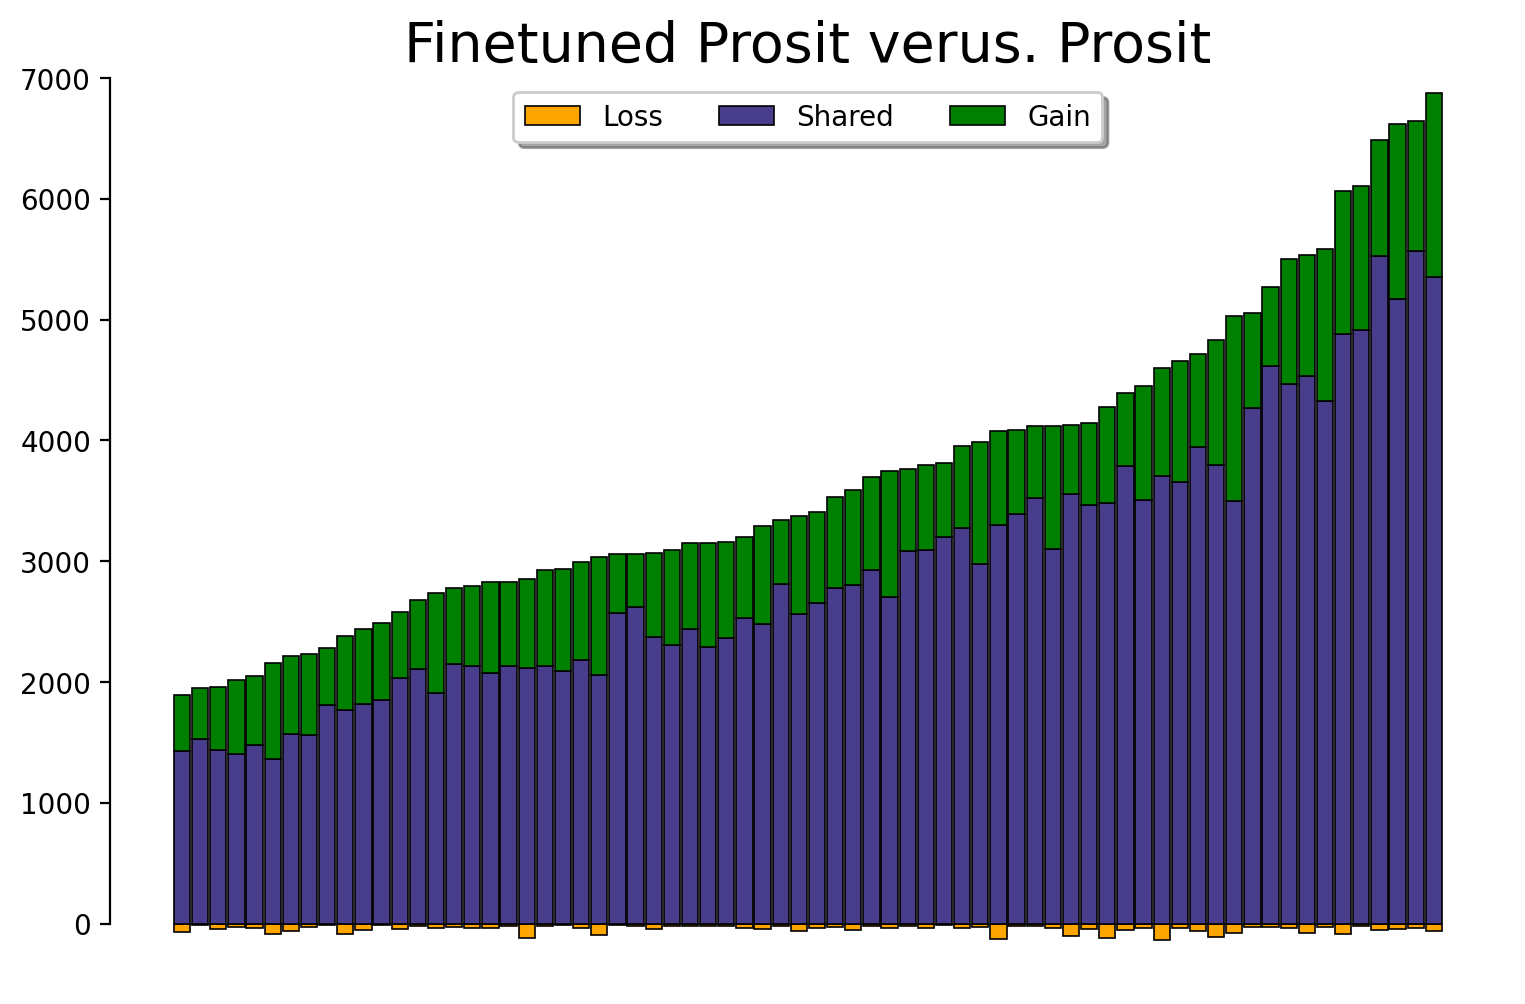

In [16]:
fig, ax = plot_alleles_lsg(all_lsg)
ax.set_title("Finetuned Prosit verus. Prosit", fontsize=20)
ax.legend(loc='upper center',
          fancybox=True, shadow=True, ncol=5)
ax.set_ylim([-500, 7000])
ax.set_yticks([i * 1000 for i in range(8)])
ax.spines['left'].set_bounds(0, 7000)
ax.set_xticks([])
# ax.axhline(0, color='black', linewidth=0.8, linestyle='--', xmin=0, xmax=0.955)
# ax.axhline(100, color='black', linewidth=0.8, linestyle='--', xmin=0, xmax=0.955)
# fig.autofmt_xdate(rotation=45)
# fig.savefig("./figs/alleles-venn-fp-p.pdf", dpi=300,)


In [9]:
all_lsg = {}

for allele in all_alleles:
    b, _, f = read_allele_len(table_data, allele)
    l, s, g = LSG(b, f)
    all_lsg[allele] = (len(l), len(s), len(g))

all_lsg = [(k, v) for k, v in all_lsg.items()]
all_lsg = sorted(all_lsg, key=lambda x: x[1][1]+x[1][2])

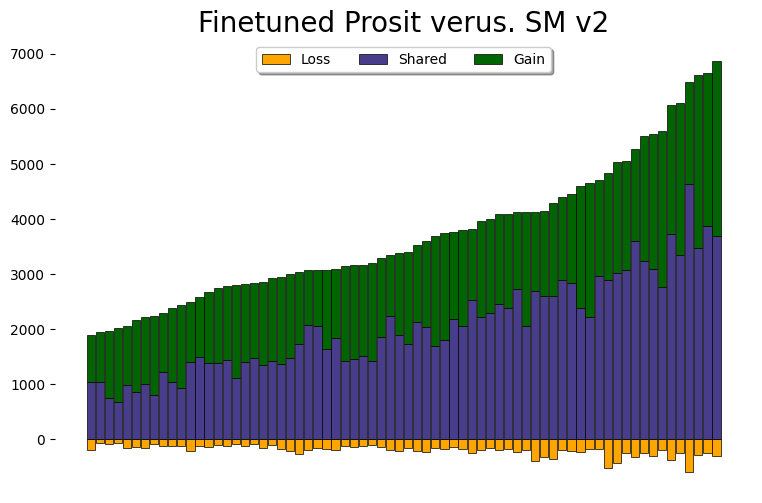

In [10]:
fig, ax = plot_alleles_lsg(all_lsg)
ax.set_title("Finetuned Prosit verus. SM v2", fontsize=20)
ax.legend(loc='upper center',
          fancybox=True, shadow=True, ncol=5)
fig.savefig("./figs/alleles-venn-fp-sm.pdf", dpi=300,)

In [11]:
all_lsg = {}

for allele in all_alleles:
    b, p, _ = read_allele_len(table_data, allele)
    l, s, g = LSG(b, p)
    all_lsg[allele] = (len(l), len(s), len(g))

all_lsg = [(k, v) for k, v in all_lsg.items()]
all_lsg = sorted(all_lsg, key=lambda x: x[1][1] + x[1][2])


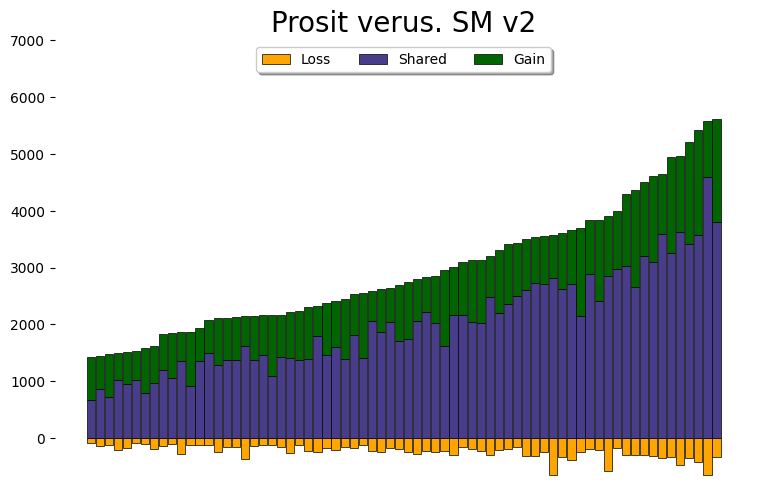

In [12]:
fig, ax = plot_alleles_lsg(all_lsg)
ax.set_title("Prosit verus. SM v2", fontsize=20)
ax.legend(loc='upper center',
          fancybox=True, shadow=True, ncol=5)
fig.savefig("./figs/alleles-venn-p-sv.pdf", dpi=300,)